In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

from datetime import datetime 

2023-11-15 21:50:39.475010: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/home/manoel/anaconda3/envs/urbansound/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
X = np.load('X.npy')
y = np.load('y.npy')

In [3]:
classes = np.unique(y)
# num_labels = y.shape[1]

In [4]:
encoder = LabelEncoder()
y = to_categorical(encoder.fit_transform(y))

In [5]:
num_labels = y.shape[1]

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val           = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=0)

In [7]:
del X, y, X_train_val, y_train_val

In [8]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6111, 40) (874, 40) (1747, 40)
(6111, 10) (874, 10) (1747, 10)


In [9]:
model=Sequential()

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

2023-11-15 21:50:43.036067: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-15 21:50:43.037085: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-11-15 21:50:43.083316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 21:50:43.084533: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:1f:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2023-11-15 21:50:43.084582: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-11-15 21:50:43.086388: I tensorflow/stream_executor/platfo

In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [10]:
epochs = 100
batch_size = 32
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', 
                               verbose=1, save_best_only=True)

In [11]:
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(X_val, y_val), 
                    callbacks=[checkpointer], 
                    verbose=1)

2023-11-14 23:01:50.634395: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-11-14 23:01:50.634883: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3199635000 Hz


Epoch 1/100
 23/191 [==>...........................] - ETA: 0s - loss: 52.1741 - accuracy: 0.1089  

2023-11-14 23:01:51.021082: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


191/191 [==============================] - 1s 5ms/step - loss: 25.2583 - accuracy: 0.1259 - val_loss: 2.2738 - val_accuracy: 0.1178

Epoch 00001: val_loss improved from inf to 2.27382, saving model to ./audio_classification.hdf5
Epoch 2/100
191/191 [==============================] - 1s 3ms/step - loss: 2.8963 - accuracy: 0.1378 - val_loss: 2.2758 - val_accuracy: 0.1419

Epoch 00002: val_loss did not improve from 2.27382
Epoch 3/100
191/191 [==============================] - 1s 3ms/step - loss: 2.3766 - accuracy: 0.1491 - val_loss: 2.2441 - val_accuracy: 0.1510

Epoch 00003: val_loss improved from 2.27382 to 2.24408, saving model to ./audio_classification.hdf5
Epoch 4/100
191/191 [==============================] - 1s 3ms/step - loss: 2.2822 - accuracy: 0.1515 - val_loss: 2.1708 - val_accuracy: 0.1854

Epoch 00004: val_loss improved from 2.24408 to 2.17084, saving model to ./audio_classification.hdf5
Epoch 5/100
191/191 [==============================] - 1s 3ms/step - loss: 2.2270 - accu

In [12]:
model = tf.keras.models.load_model('audio_classification.hdf5')

In [20]:
y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)

[5 3 4 ... 1 9 2]


In [17]:
np.argmax(y_test, axis=1)

array([5, 1, 4, ..., 1, 2, 2])

In [24]:
accuracy  = metrics.accuracy_score(np.argmax(y_test, axis=1), y_pred)
precision = metrics.precision_score(np.argmax(y_test, axis=1), y_pred, average='macro')
recall    = metrics.recall_score(np.argmax(y_test, axis=1), y_pred, average='macro')
f1_score  = metrics.f1_score(np.argmax(y_test, axis=1), y_pred, average='macro')

In [25]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)

Accuracy: 0.7492844876931883
Precision: 0.7992480910616278
Recall: 0.7245281793081854
F1-Score: 0.738350416294985


In [118]:
confusion_matrix = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred).astype(float)
total_per_row = confusion_matrix.astype(float).sum(axis=1)
cm = np.zeros(confusion_matrix.shape)

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        cm[i][j] = confusion_matrix[i][j] / total_per_row[i]

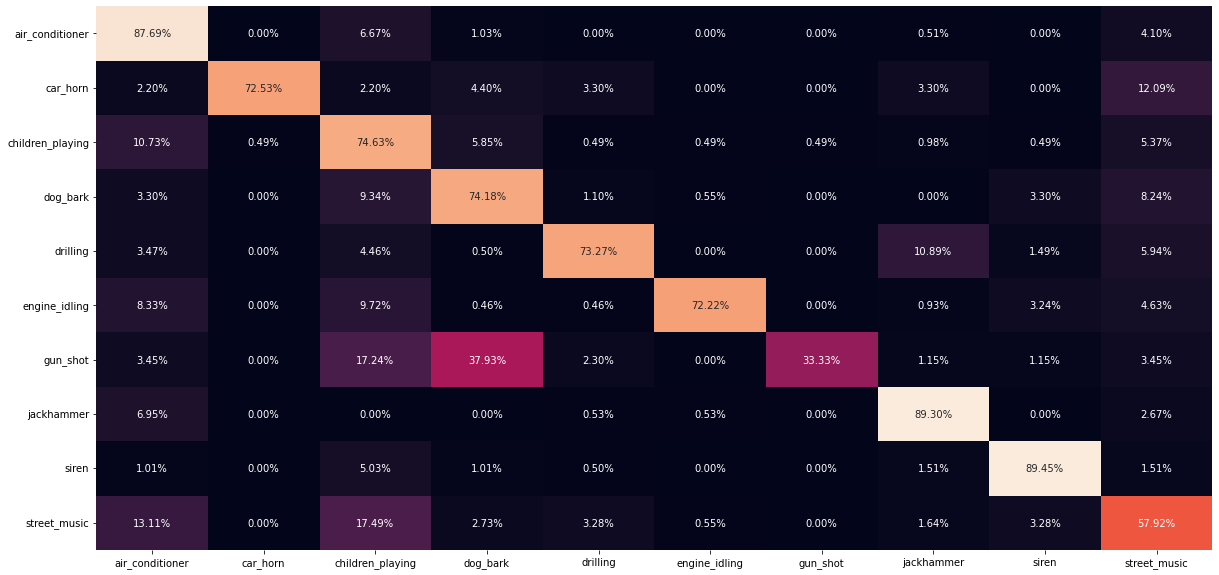

In [119]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(cm, annot=True, fmt='.2%', cbar=False)
ax.set_yticklabels(classes)
ax.set_xticklabels(classes)
plt.yticks(rotation=0)
plt.show()